# 1. 환경설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
# 지수표현 없애기
pd.options.display.float_format = '{:.2f}'.format

# 2. 데이터 불러오기 및 전처리


## 2-1. 노출 관련 테이블

In [3]:
processed_school_path = 'dumps/processed/processed_accounts_school.csv'
processed_user_contacts_path = 'dumps/processed/processed_accounts_user_contacts.csv'
processed_school = pd.read_csv(processed_school_path)
processed_user_contacts = pd.read_csv(processed_user_contacts_path)

In [4]:
processed_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5951 non-null   int64 
 1   address           5951 non-null   object
 2   student_count     5951 non-null   int64 
 3   school_type       5951 non-null   object
 4   address_clean     5948 non-null   object
 5   is_active_school  5951 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 238.4+ KB


In [5]:
processed_school[processed_school['address_clean'].isna()]

,id,address,student_count,school_type,address_clean,is_active_school
5934,5948,-,2,H,NaN,False
5935,5949,-,1,H,NaN,False
5949,5964,-,1,H,NaN,False


In [6]:
# 전처리
processed_school['id'] = processed_school['id'].astype(str) # id 고유값 문자형 변환
processed_school.rename(columns={'id': 'school_id'}, inplace=True) # id 컬럼 이름 변경
processed_school.drop(columns='address', inplace=True)
processed_school.dropna(subset='address_clean', inplace=True)

In [7]:
processed_school.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5948 entries, 0 to 5950
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school_id         5948 non-null   object
 1   student_count     5948 non-null   int64 
 2   school_type       5948 non-null   object
 3   address_clean     5948 non-null   object
 4   is_active_school  5948 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 238.2+ KB


In [8]:
processed_school.head()

,school_id,student_count,school_type,address_clean,is_active_school
0,4,239,H,충청북도 충주시,True
1,5,160,M,충청북도 충주시,True
2,6,200,H,충청북도 충주시,True
3,7,114,H,충청북도 충주시,True
4,8,139,M,충청북도 충주시,True


In [9]:
processed_user_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   user_id              5063 non-null   int64 
 2   contacts_count       5063 non-null   int64 
 3   invite_user_id_list  1158 non-null   object
 4   invite_cnt           5063 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 197.9+ KB


In [10]:
# 전처리
import ast
def convert_to_list(x):
    try:
        if pd.isna(x) or x == "": return []
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

processed_user_contacts['invite_user_id_list'] = processed_user_contacts['invite_user_id_list'].apply(convert_to_list) # 리스트인척 하는 문자열을 진짜 리스트로 변환
processed_user_contacts['user_id'] = processed_user_contacts['user_id'].astype(str) # id 문자열 형변환
processed_user_contacts.drop(columns=['id'], inplace=True) # 불필요한 컬럼 제거
processed_user_contacts.rename(columns={'invite_cnt': 'invite_count'}, inplace=True) # 컬럼 이름 변경

## 2-2. 유입 관련 테이블

In [11]:
processed_user_path = 'dumps/processed/processed_accounts_user.csv'
processed_user = pd.read_csv(processed_user_path)

In [12]:
processed_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676978 entries, 0 to 676977
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_id             676978 non-null  int64 
 1   gender              676978 non-null  object
 2   point               676978 non-null  int64 
 3   friend_id_list      674111 non-null  object
 4   is_push_on          676978 non-null  int64 
 5   created_at          676978 non-null  object
 6   block_user_id_list  676978 non-null  object
 7   hide_user_id_list   676978 non-null  object
 8   ban_status          676978 non-null  object
 9   report_count        676978 non-null  int64 
 10  alarm_count         676978 non-null  int64 
 11  pending_chat        676978 non-null  int64 
 12  pending_votes       676978 non-null  int64 
 13  group_id            676978 non-null  int64 
 14  friend_count        676978 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 77.5+ MB


In [13]:
# 전처리
processed_user['created_at'] = pd.to_datetime(processed_user['created_at']).dt.floor('s')
processed_user['user_id'] = processed_user['user_id'].astype(str)
# processed_user['group_id'] = processed_user['group_id'].astype(str).str.split('.').str[0]
processed_user['group_id'] = processed_user['group_id'].astype(int).astype(str)

In [14]:
processed_user['group_id'].head()

0    12
1     1
2     1
3    12
4    12
Name: group_id, dtype: object

In [15]:
# 기간 설정
timeframe_user_condition = processed_user['created_at'].between('2023-05-13', '2024-05-07')
processed_user = processed_user[timeframe_user_condition]

In [16]:
processed_user.describe()

,point,is_push_on,created_at,report_count,alarm_count,pending_chat,pending_votes,friend_count
count,363134.00,363134.00,363134,363134.00,363134.00,363134.00,363134.00,363134.00
mean,1614.57,0.84,2023-05-23 01:52:50.418644224,0.03,0.88,0.08,66.43,48.09
min,0.00,0.00,2023-05-13 00:00:02,0.00,0.00,-1.00,0.00,0.00
25%,383.00,1.00,2023-05-15 17:40:44.249999872,0.00,1.00,0.00,1.00,27.00
50%,912.00,1.00,2023-05-19 19:46:40.500000,0.00,1.00,0.00,17.00,43.00
75%,2096.00,1.00,2023-05-24 13:39:24.249999872,0.00,1.00,0.00,89.00,64.00
max,206081.00,1.00,2024-05-06 22:48:40,57.00,238.00,256.00,2744.00,1373.00
std,2170.49,0.36,NaN,0.33,0.95,0.64,106.41,30.90


## 3-2. 외부 데이터


In [17]:
middle_path = 'dumps/2023년도_학년별·학급별 학생수(고)_전체.csv'
high_path = 'dumps/2023년도_학년별·학급별 학생수(고)_전체.csv'
raw_middle_school = pd.read_csv(middle_path)
raw_high_school = pd.read_csv(high_path)

In [18]:
raw_middle_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시도교육청         2379 non-null   object 
 1   교육지원청         2379 non-null   object 
 2   지역            2379 non-null   object 
 3   정보공시 학교코드     2379 non-null   object 
 4   학교명           2379 non-null   object 
 5   학교급코드         2379 non-null   int64  
 6   설립구분          2379 non-null   object 
 7   제외여부          2379 non-null   object 
 8   제외사유          2 non-null      object 
 9   1학년 학급수       2379 non-null   int64  
 10  1학년 학생수       2379 non-null   int64  
 11  1학년 학급당 학생수   2379 non-null   float64
 12  2학년 학급수       2379 non-null   int64  
 13  2학년 학생수       2379 non-null   int64  
 14  2학년 학급당 학생수   2379 non-null   float64
 15  3학년 학급수       2379 non-null   int64  
 16  3학년 학생수       2379 non-null   int64  
 17  3학년 학급당 학생수   2379 non-null   float64
 18  특수학급 학급수      2379 non-null 

In [19]:
raw_middle_school.columns

Index(['시도교육청', '교육지원청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '1학년 학급수', '1학년 학생수', '1학년 학급당 학생수', '2학년 학급수', '2학년 학생수',
       '2학년 학급당 학생수', '3학년 학급수', '3학년 학생수', '3학년 학급당 학생수', '특수학급 학급수',
       '특수학급 학생수', '특수학급 학급당 학생수', '순회학급 학급수', '순회학급 학생수', '순회학급 학급당 학생수',
       '학급수(계)', '학생수(계)', '학급당 학생수(계)', '교사수', '수업교원 1인당 학생수'],
      dtype='object')

In [20]:
raw_high_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시도교육청         2379 non-null   object 
 1   교육지원청         2379 non-null   object 
 2   지역            2379 non-null   object 
 3   정보공시 학교코드     2379 non-null   object 
 4   학교명           2379 non-null   object 
 5   학교급코드         2379 non-null   int64  
 6   설립구분          2379 non-null   object 
 7   제외여부          2379 non-null   object 
 8   제외사유          2 non-null      object 
 9   1학년 학급수       2379 non-null   int64  
 10  1학년 학생수       2379 non-null   int64  
 11  1학년 학급당 학생수   2379 non-null   float64
 12  2학년 학급수       2379 non-null   int64  
 13  2학년 학생수       2379 non-null   int64  
 14  2학년 학급당 학생수   2379 non-null   float64
 15  3학년 학급수       2379 non-null   int64  
 16  3학년 학생수       2379 non-null   int64  
 17  3학년 학급당 학생수   2379 non-null   float64
 18  특수학급 학급수      2379 non-null 

In [21]:
raw_high_school.columns

Index(['시도교육청', '교육지원청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '1학년 학급수', '1학년 학생수', '1학년 학급당 학생수', '2학년 학급수', '2학년 학생수',
       '2학년 학급당 학생수', '3학년 학급수', '3학년 학생수', '3학년 학급당 학생수', '특수학급 학급수',
       '특수학급 학생수', '특수학급 학급당 학생수', '순회학급 학급수', '순회학급 학생수', '순회학급 학급당 학생수',
       '학급수(계)', '학생수(계)', '학급당 학생수(계)', '교사수', '수업교원 1인당 학생수'],
      dtype='object')

In [22]:
# 중학교/고등학교별 테이블에 구분자 추가
raw_high_school['school_type'] = 'H'
raw_middle_school['school_type'] = 'M'

In [23]:
# 중학교/고등학교 테이블 병합
raw_school_nationwide = pd.concat([raw_high_school, raw_middle_school])
raw_school_nationwide.columns

Index(['시도교육청', '교육지원청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '1학년 학급수', '1학년 학생수', '1학년 학급당 학생수', '2학년 학급수', '2학년 학생수',
       '2학년 학급당 학생수', '3학년 학급수', '3학년 학생수', '3학년 학급당 학생수', '특수학급 학급수',
       '특수학급 학생수', '특수학급 학급당 학생수', '순회학급 학급수', '순회학급 학생수', '순회학급 학급당 학생수',
       '학급수(계)', '학생수(계)', '학급당 학생수(계)', '교사수', '수업교원 1인당 학생수', 'school_type'],
      dtype='object')

In [24]:
# 필요한 컬럼만 추출
processed_school_nationwide = raw_school_nationwide[['지역', '학교명', '1학년 학급수', '1학년 학생수', '1학년 학급당 학생수', '2학년 학급수', '2학년 학생수',
       '2학년 학급당 학생수', '3학년 학급수', '3학년 학생수', '3학년 학급당 학생수', '학급수(계)', '학생수(계)', '학급당 학생수(계)']].copy()
processed_school_nationwide.head()

,지역,학교명,1학년 학급수,1학년 학생수,1학년 학급당 학생수,2학년 학급수,2학년 학생수,2학년 학급당 학생수,3학년 학급수,3학년 학생수,3학년 학급당 학생수,학급수(계),학생수(계),학급당 학생수(계)
0,서울특별시 강남구,국립국악고등학교,5,152,30.40,5,144,28.80,5,140,28.00,15,436,29.10
1,서울특별시 성북구,서울대학교사범대학부설고등학교,8,244,30.50,8,230,28.80,8,215,26.90,27,711,26.30
2,서울특별시 금천구,국립전통예술고등학교,6,181,30.20,6,174,29.00,6,163,27.20,18,518,28.80
3,서울특별시 송파구,가락고등학교,10,278,27.80,10,239,23.90,10,248,24.80,30,765,25.50
4,서울특별시 강동구,강동고등학교,8,254,31.80,8,225,28.10,8,193,24.10,24,672,28.00


In [25]:
# 주소지 정리
print(f"내부데이터 학교 주소지: {processed_school['address_clean'].nunique()}")
print(f"외부데이터 학교 주소지: {processed_school_nationwide['지역'].nunique()}")

내부데이터 학교 주소지: 276
외부데이터 학교 주소지: 255


In [26]:
# 고유 주소지 리스트 생성
inner_addr = set(processed_school['address_clean'].unique())
outer_addr = set(processed_school_nationwide['지역'].unique())

# 내부 데이터에만 있는 주소지
only_inner = sorted(list(inner_addr - outer_addr))
print(f"내부에만 있는 지역 ({len(only_inner)}개): {only_inner}")

# 외부 데이터에만 있는 주소지
only_outer = sorted(list(outer_addr - inner_addr))
print(f"\n외부에만 있는 지역 ({len(only_outer)}개): {only_outer}")

내부에만 있는 지역 (62개): ['강원도 강릉시', '강원도 고성군', '강원도 동해시', '강원도 삼척시', '강원도 속초시', '강원도 양구군', '강원도 양양군', '강원도 영월군', '강원도 원주시', '강원도 인제군', '강원도 정선군', '강원도 철원군', '강원도 춘천시', '강원도 태백시', '강원도 평창군', '강원도 홍천군', '강원도 화천군', '강원도 횡성군', '강원도정선군', '경기도 부천시', '경기도 화성시', '경기도군포시', '경기도용인시 기흥구', '경기도용인시 수지구', '경기도의왕시', '경기도하남시', '경상남도진주시', '경상남도창원시 마산합포구', '경상남도창원시 의창구', '경상남도창원시 진해구', '경상북도 군위군', '경상북도김천시', '경상북도영양군', '경상북도의성군', '대구광역시수성구', '서울특별시광진구', '서울특별시노원구', '서울특별시동대문구', '서울특별시마포구', '서울특별시서대문구', '인천광역시남동구', '전라북도 고창군', '전라북도 군산시', '전라북도 김제시', '전라북도 남원시', '전라북도 무주군', '전라북도 부안군', '전라북도 순창군', '전라북도 완주군', '전라북도 익산시', '전라북도 임실군', '전라북도 장수군', '전라북도 전주시 덕진구', '전라북도 전주시 완산구', '전라북도 정읍시', '전라북도 진안군', '전라북도정읍시', '제주특별자치도서귀포시', '충청남도 세종특별자치시', '충청남도서산시', '충청남도아산시', '충청남도천안시 동남구']

외부에만 있는 지역 (41개): ['강원특별자치도 강릉시', '강원특별자치도 고성군', '강원특별자치도 동해시', '강원특별자치도 삼척시', '강원특별자치도 속초시', '강원특별자치도 양구군', '강원특별자치도 양양군', '강원특별자치도 영월군', '강원특별자치도 원주시', '강원특별자치도 인제군', '강원특별자치도 정선군', '강원특별자치도 철원군', '강원특별자치도 춘천시', '강원특별자치도 태백시', '강원특별자치

In [27]:
# 굿 제미나이.
def clean_address(addr):
    if pd.isna(addr): return addr
    
    # 1. 기본적인 오타 및 붙여쓰기 보정 (띄어쓰기 한 칸으로 통일)
    # '경기도용인시' -> '경기도 용인시' 형태가 되도록 주요 도/시 뒤에 공백 추가
    target_cities = ['강원도', '경기도', '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도', 
                     '제주특별자치도', '서울특별시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시']
    
    for city in target_cities:
        if addr.startswith(city) and not addr.startswith(city + " "):
            addr = addr.replace(city, city + " ")

    # 2. 행정구역 명칭 변경 업데이트 (최신 기준)
    addr = addr.replace('강원도 ', '강원특별자치도 ')
    addr = addr.replace('전라북도 ', '전북특별자치도 ')
    addr = addr.replace('경상북도 군위군', '대구광역시 군위군')
    addr = addr.replace('충청남도 세종특별자치시', '세종특별자치시')
    
    # 3. 상세 구(區) 단위 제거 (외부 데이터와 수준 맞추기)
    # 예: '전주시 덕진구' -> '전주시', '부천시 원미구' -> '부천시'
    # 데이터 상황에 따라 구 단위까지 맞출지, 시 단위로 자를지 결정해야 합니다.
    # 여기서는 외부 데이터의 '세종특별자치시' 등을 고려해 시/군 단위까지만 남기는 로직입니다.
    parts = addr.split()
    if len(parts) > 2:
        # 도/시 + 시/군 까지만 합침 (구 단위 버림)
        return parts[0] + " " + parts[1]
    
    return " ".join(parts)

# 내부 데이터에 적용
processed_school['address_fixed'] = processed_school['address_clean'].apply(clean_address)

# 외부 데이터도 동일하게 시/군 단위로 정리 (비교를 위해)
processed_school_nationwide['지역_fixed'] = processed_school_nationwide['지역'].apply(lambda x: " ".join(x.split()[:2]) if pd.notna(x) else x)

In [28]:
# 내용 검토

# 고유 주소지 리스트 생성
inner_addr = set(processed_school['address_fixed'].unique())
outer_addr = set(processed_school_nationwide['지역_fixed'].unique())

# 내부 데이터에만 있는 주소지
only_inner = sorted(list(inner_addr - outer_addr))
print(f"내부에만 있는 지역 ({len(only_inner)}개): {only_inner}")

# 외부 데이터에만 있는 주소지
only_outer = sorted(list(outer_addr - inner_addr))
print(f"\n외부에만 있는 지역 ({len(only_outer)}개): {only_outer}")

내부에만 있는 지역 (0개): []

외부에만 있는 지역 (0개): []


In [29]:
processed_school.head()

,school_id,student_count,school_type,address_clean,is_active_school,address_fixed
0,4,239,H,충청북도 충주시,True,충청북도 충주시
1,5,160,M,충청북도 충주시,True,충청북도 충주시
2,6,200,H,충청북도 충주시,True,충청북도 충주시
3,7,114,H,충청북도 충주시,True,충청북도 충주시
4,8,139,M,충청북도 충주시,True,충청북도 충주시


In [30]:
# 불필요하게 중복된 컬럼 삭제
processed_school.drop(columns=['address_clean'], inplace=True)
processed_school.rename(columns={'address_fixed': 'address'}, inplace=True)

In [31]:
processed_school_nationwide.drop(columns=['지역'], inplace=True)
processed_school_nationwide.rename(columns={'지역_fixed': 'address'}, inplace=True)

# 3. 데이터 분석

- 활성화되지 않은 학교에서도 활성화를 위한 온/오프라인 노출이 있었을 가능성이 있기 때문에
- 노출 단계에서는 활성화되지 않은 학교도 포함시켜야하므로
- 유입에 대한 필터링 없이 전체 유저를 카운트하여 계산

## 3-1. 추천에 의한 노출

In [32]:
processed_user_contacts.head()

,user_id,contacts_count,invite_user_id_list,invite_count
0,1167696,30,[],0
1,863169,79,[],0
2,857205,21,[854615],1
3,851431,29,[],0
4,855476,28,[849318],1


In [33]:
processed_user_contacts.describe()

,contacts_count,invite_count
count,5063.00,5063.00
mean,25.99,0.33
std,13.60,0.75
min,0.00,0.00
25%,16.00,0.00
50%,24.00,0.00
75%,34.00,0.00
max,114.00,10.00


In [34]:
# 초대를 보낸 유저의 고유값
inviters = processed_user_contacts['invite_user_id_list'].sum()
inviter_list = list(set(inviters))
len(inviter_list)

1122

In [35]:
type(inviter_list)

list

In [36]:
processed_user_contacts[processed_user_contacts['user_id'].isin(inviter_list)]

,user_id,contacts_count,invite_user_id_list,invite_count


In [37]:
inviters = pd.Series(inviters)
print(f"초대를 보냈던(받았던) 전체 집계: {processed_user_contacts['invite_count'].sum()}건")
print(f"초대를 가장 많이 보낸 top10\n{inviters.value_counts().head(10)}")
print(f"한 명이 보낸 초대의 평균: {inviters.value_counts().mean():.2f}")

초대를 보냈던(받았던) 전체 집계: 1687건
초대를 가장 많이 보낸 top10
1154585    21
1233225    17
883602     16
1041381    14
873001     14
885409     10
1417159     9
1062378     9
883507      9
1210380     8
Name: count, dtype: int64
한 명이 보낸 초대의 평균: 1.50


In [38]:
# 유저당 초대받았던 기록의 합계
processed_user_contacts['invite_count'].sum()

np.int64(1687)

In [39]:
# 이 유저의 연락처를 가지고있는 사람들 중 실제로 초대를 받은 비율
invite_ratio = processed_user_contacts['invite_count'] / processed_user_contacts['contacts_count'] * 100
invite_ratio.describe()

count   5060.00
mean       1.21
std        3.06
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      100.00
dtype: float64

In [40]:
# 100%가 어케나와요
processed_user_contacts.iloc[invite_ratio.idxmax()]

user_id                  945228
contacts_count                1
invite_user_id_list    [887254]
invite_count                  1
Name: 2753, dtype: object

In [41]:
invite_ratio.value_counts().sort_index()
# 전체 5063명 중 연락처 대비 초대수가 없거나, 초대를 받지 않은 유저는 3902명, 이상치(100%)는 1명

0.00      3902
0.93         1
1.32         1
1.35         2
1.43         1
          ... 
22.73        1
24.32        1
25.00        1
37.50        1
100.00       1
Name: count, Length: 143, dtype: int64

In [42]:
invite_ratio[invite_ratio > 0].reset_index()

,index,0
0,2,4.76
1,4,3.57
2,5,3.23
3,6,4.44
4,8,11.54
...,...,...
1153,5014,5.26
1154,5029,5.26
1155,5044,9.09
1156,5045,12.50


In [43]:
invite_ratio.head()

0   0.00
1   0.00
2   4.76
3   0.00
4   3.57
dtype: float64

In [44]:
inviter_count = processed_user_contacts['user_id'].nunique() # 초대 테이블에 있는 전체 유저
invited_count = invite_ratio[invite_ratio > 0] # 초대 테이블에 있는 전체 유저 중 초대받은 기록이 없는 유저
inviter_outlier_count = len(invite_ratio[invite_ratio > 50]) # 초대받은 기록이 50% 이상은 이상치로 간주
print(f"초대를 받았던 유저 비율: {len(invited_count) / (inviter_count - inviter_outlier_count) * 100:.2f}")
print(f"초대를 받은?\n{invited_count}")

초대를 받았던 유저 비율: 22.88
초대를 받은?
2       4.76
4       3.57
5       3.23
6       4.44
8      11.54
        ... 
5014    5.26
5029    5.26
5044    9.09
5045   12.50
5046    9.09
Length: 1158, dtype: float64


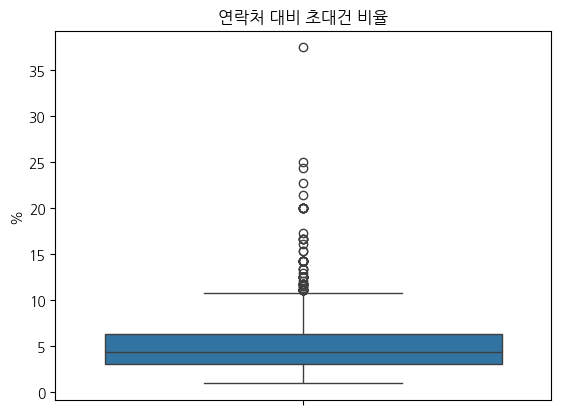

In [45]:
# 50% 이상: 이상치,0%: 결측치로 정의, 제외하고 그래프 확인
invite_condition = (invite_ratio > 0) & (invite_ratio <= 50)
plt.figure()
sns.boxplot(
    data=invite_ratio[invite_condition]
)
plt.title('연락처 대비 초대건 비율')
plt.ylabel('%')
plt.show()

In [46]:
# 연락처 대비 초대건 비율의 평균을 5%로 계산
print(f"한 사람당 가지고 있는 연락처의 평균 중 초대하는 사람 수: {(processed_user_contacts['contacts_count'].mean()) * 0.05:.2f}")
print(f"유저의 전체 연락처 중 초대 가능성이 있는 수: {(processed_user_contacts['contacts_count'].sum()) * 0.05 * ((5059 - 3902) / 5059):.2f}")
# 한 사람 당 평균 1.3명 초대한다고 볼 수 있음
# 약간 1+1 느낌이네

한 사람당 가지고 있는 연락처의 평균 중 초대하는 사람 수: 1.30
유저의 전체 연락처 중 초대 가능성이 있는 수: 1504.49


- 데이터(테이블) 설명
    - 전화번호를 기준으로 해당 전화번호를 가지고있는 유저의 수와 해당 전화번호에게 친구 초대를 보냈던 유저에 대한 기록이 있는 테이블
    - 개인정보 보호를 위해 전화번호에 대한 컬럼은 삭제되어있고, 해당 전화번호를 등록한 유저 아이디가 연계되어있음.
    - 따라서 이 유저 아이디를 이 전화번호의 고유값으로 대체 할 수 있음
- 유저 집계
    - 초대테이블 유저의 고유값은 5067명
    - 그 중 초대를 1번 이상 받았던건 1158명(전체 중 약 22.88%)
    - 초대를 보낸 유저는 1122명
    - 초대를 보냈던 유저 아이디 =/= 초대를 받은 유저 아이디 -> 한 명도 일치하지 않음.
- 초대에 대한 집계
    - 합계: 1687건
    - 한 명이 보낸 최대 초대 횟수: 21회
    - 초대 발송 평균: 약 1.5회
- 보낸 사람와 받은 사람의 비율이 거의 1:1이고, 한명도 겹치지 않기 때문에 초대를 받은 사람만큼 초대를 보낸 사람이 있을 수 있다고 판단
- 초대 발송 평균 횟수는 1.5회, 초대를 받았던건 전체(약 5천명) 중 약 23%, 유저 테이블의 전체 수는 약 67만명
- 친구 초대로 인한 노출 정도 = (67만 명 * 23%) * 1.5 회 = 약 23만 건의 노출 가능성이 있다.

## 3-2. 오프라인(학교 내) 노출

- 오프라인(학교 내) 노출의 경우 전국 중/고등학교의 학생 수와 학교 관련 테이블을 비교하여
- 학교별(중/고등학교로만 구분), 지역별 활성도를 파악
- 활성도에 따른 노출도 추정

In [47]:
processed_school.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5948 entries, 0 to 5950
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school_id         5948 non-null   object
 1   student_count     5948 non-null   int64 
 2   school_type       5948 non-null   object
 3   is_active_school  5948 non-null   bool  
 4   address           5948 non-null   object
dtypes: bool(1), int64(1), object(3)
memory usage: 238.2+ KB


In [48]:
processed_school_nationwide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4758 entries, 0 to 2378
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   학교명          4758 non-null   object 
 1   1학년 학급수      4758 non-null   int64  
 2   1학년 학생수      4758 non-null   int64  
 3   1학년 학급당 학생수  4758 non-null   float64
 4   2학년 학급수      4758 non-null   int64  
 5   2학년 학생수      4758 non-null   int64  
 6   2학년 학급당 학생수  4758 non-null   float64
 7   3학년 학급수      4758 non-null   int64  
 8   3학년 학생수      4758 non-null   int64  
 9   3학년 학급당 학생수  4758 non-null   float64
 10  학급수(계)       4758 non-null   int64  
 11  학생수(계)       4758 non-null   int64  
 12  학급당 학생수(계)   4758 non-null   float64
 13  address      4758 non-null   object 
dtypes: float64(4), int64(8), object(2)
memory usage: 557.6+ KB


In [49]:
# 내부데이터와 외부데이터 병합
inner_school_count = processed_school.groupby('address').agg(total_count=('student_count', 'sum')).reset_index()
outer_school_count = processed_school_nationwide.groupby('address').agg(total_count=('학생수(계)', 'sum')).reset_index()
total_school_count = pd.merge(inner_school_count, outer_school_count, on='address')

total_school_count.rename(columns={'total_count_x': 'inner_count', 'total_count_y':'outer_count'}, inplace=True) # 컬럼명 수정
total_school_count['ratio'] = round(total_school_count['inner_count'] / total_school_count['outer_count'] * 100, 2) # 비율 컬럼 추가
total_school_count['city'] = total_school_count['address'].str.split().str[0] # 대분류용 도시별 컬럼 추가

total_school_count.head()

,address,inner_count,outer_count,ratio,city
0,강원특별자치도 강릉시,3117,10132,30.76,강원특별자치도
1,강원특별자치도 고성군,200,784,25.51,강원특별자치도
2,강원특별자치도 동해시,1962,4660,42.10,강원특별자치도
3,강원특별자치도 삼척시,377,2704,13.94,강원특별자치도
4,강원특별자치도 속초시,1064,3786,28.10,강원특별자치도


In [50]:
# 도시별 학생 수 집계
total_school_city_count = total_school_count.groupby('city')[['inner_count', 'outer_count']].sum().reset_index()
total_school_city_count['ratio'] = round(total_school_city_count['inner_count'] / total_school_city_count['outer_count'] * 100, 2)
total_school_city_count.sort_values('ratio', ascending=False, inplace=True)
total_school_city_count.head()

,city,inner_count,outer_count,ratio
13,전북특별자치도,34449,96490,35.70
12,전라남도,31564,90512,34.87
10,울산광역시,19950,60686,32.87
9,세종특별자치시,7700,24888,30.94
15,충청남도,35097,114686,30.60


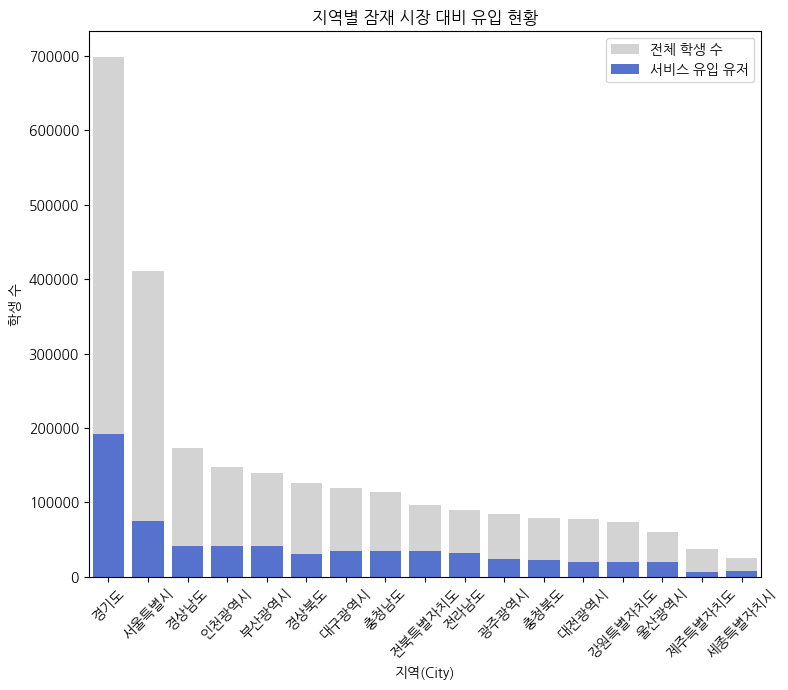

In [58]:
count_sorted = total_school_city_count.sort_values('outer_count', ascending=False)
city_order = count_sorted['city'].tolist()

plt.figure(figsize=(8, 7))

# 외부 데이터 (배경 - 연한 색)
sns.barplot(
    data=count_sorted, 
    x='city', 
    y='outer_count', 
    order=city_order, 
    color='lightgrey', 
    label='전체 학생 수', 
    errorbar=None)

# 내부 데이터 (앞쪽 - 강조 색)
sns.barplot(
    data=count_sorted, 
    x='city', 
    y='inner_count', 
    order=city_order, 
    color='royalblue', 
    label='서비스 유입 유저', 
    errorbar=None)

plt.title('지역별 잠재 시장 대비 유입 현황',)
plt.xlabel('지역(City)')
plt.ylabel('학생 수')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

- 외부데이터를 2023년 기준으로 다운받았는데 내부데이터 날짜 없긴 함
- 다른 내부데이터 날짜들이 230428 ~ 240508 인데 .. 2024년도 받아서 평균을 내야하나?
    - 아니면 한 학년 기준이 23년 3월 ~ 24년 2월이니까 그냥 둬도 될까?